# modify data

In [1]:
import mne

sample_data_folder = mne.datasets.sample.data_path()
sample_data_raw_file = (sample_data_folder / 'MEG' / 'sample' /
                        'sample_audvis_raw.fif')
# the preload flag loads the data into memory now
raw = mne.io.read_raw_fif(sample_data_raw_file, preload=True)
raw.crop(tmax=10.)  # raw.crop() always happens in-place

Opening raw data file /Users/DanDan/mne_data/MNE-sample-data/MEG/sample/sample_audvis_raw.fif...
    Read a total of 3 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
    Range : 25800 ... 192599 =     42.956 ...   320.670 secs
Ready.
Reading 0 ... 166799  =      0.000 ...   277.714 secs...


<Raw | sample_audvis_raw.fif, 376 x 6007 (10.0 s), ~20.5 MB, data loaded>

# signal processing

In [2]:
original_raw = raw.copy()
raw.apply_hilbert()
print(f'original data type was {original_raw.get_data().dtype}, after '
      f'apply_hilbert the data type changed to {raw.get_data().dtype}.')

original data type was float64, after apply_hilbert the data type changed to complex128.


# pick channel

In [3]:
print(f'original data had {original_raw.info["nchan"]} channels.')
original_raw.pick('eeg')  # selects only the EEG channels
print(f'after picking, it has {original_raw.info["nchan"]} channels.')

original data had 376 channels.
Removing projector <Projection | PCA-v1, active : False, n_channels : 102>
Removing projector <Projection | PCA-v2, active : False, n_channels : 102>
Removing projector <Projection | PCA-v3, active : False, n_channels : 102>
after picking, it has 60 channels.


EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Using matplotlib as 2D backend.


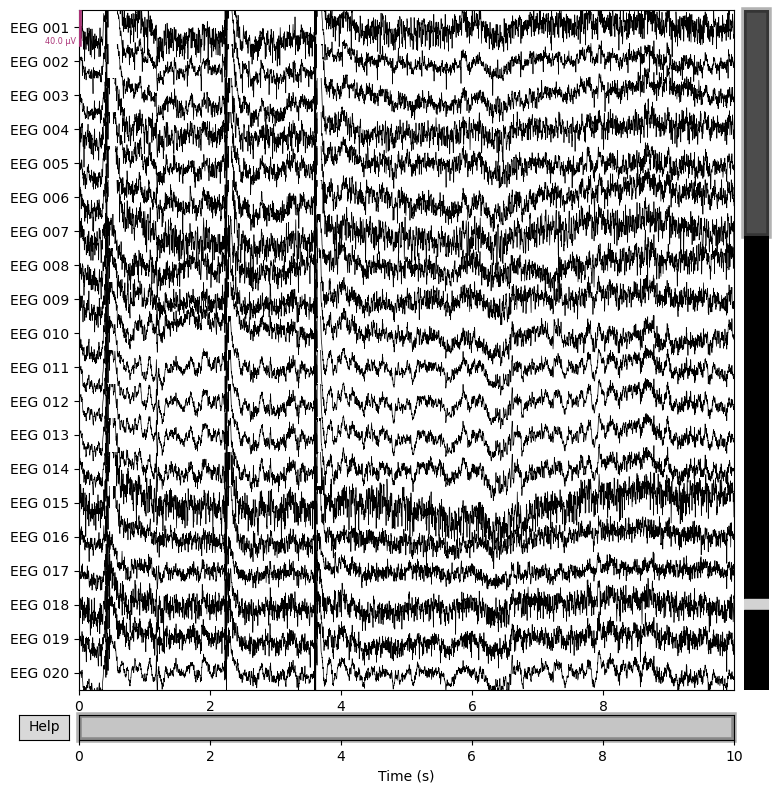

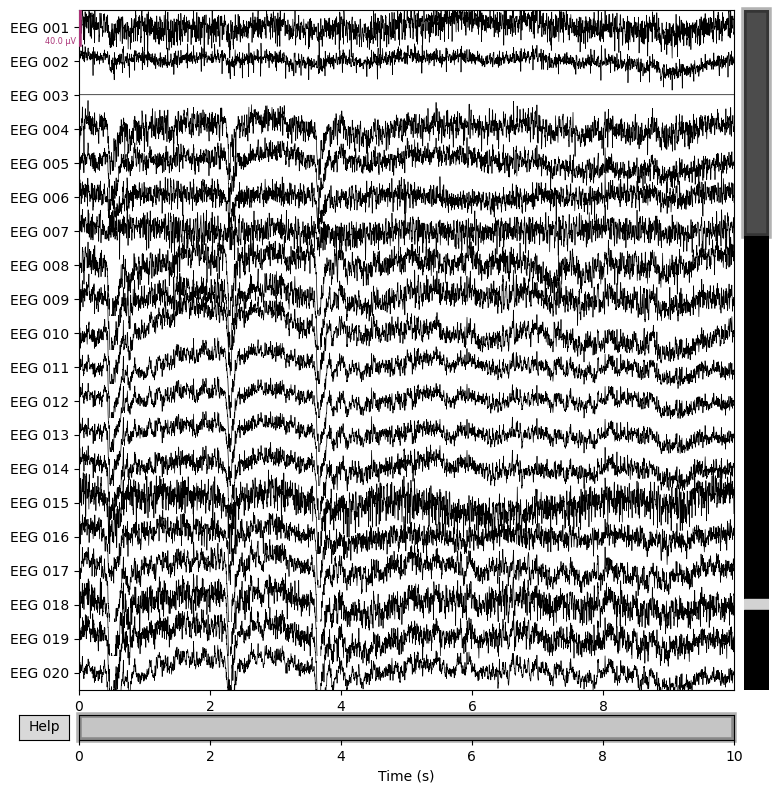

In [4]:
# 
rereferenced_raw, ref_data = mne.set_eeg_reference(original_raw, ['EEG 003'],
                                                   copy=True)
fig_orig = original_raw.plot()
fig_reref = rereferenced_raw.plot()